## Entornos data science - Python

### Parte 1 

En esta primera parte trabajaremos con datos de cotización de Bitcoin. En la página http://www.coindesk.com/price/ se pueden descargar los valores de “cierre” de esa cotización en dólares en diferentes mercados “exchanges” mediante el botón “Export” del gráfico, como CSV.

#### Lectura de datos

• Obtén de coindex los datos de al menos tres exchanges como ficheros CSV separados para al menos un período de un año.

• Carga los datos como un DataFrame fusionando los ficheros en uno solo.

• Utiliza como índice la fecha de cotización.

In [56]:
import pandas as pd # descargo la biblioteca pandas
import numpy as np  # descargo la biblioteca numpy
import matplotlib as plt   # descargo la biblioteca matplotlib
#plt.style.use('ggplot')

Voy a importar los datos de un año de tres exchanges: bitstamp, coinbase e itbit. Descargas de la página web fallan, por lo cual tomo como fuente descargas de Bloomberg.

In [57]:
bitstamp = pd.read_csv('BITSTAMP.csv', sep = ';', decimal=',', parse_dates=['Date'], header=0, names=['Date','Value_bitstamp'])
coinbase = pd.read_csv('COINBASE.csv', sep = ';',decimal=',', parse_dates=['Date'], header=0, names=['Date','Value_coinbase'])
itbit= pd.read_csv('ITBIT.csv', sep = ';', decimal=',', parse_dates=['Date'],header=0, names=['Date','Value_itbit'])

Compruebo la carga de datos.

In [58]:
bitstamp.sort_values(by='Date', ascending=1).head()

,Date,Value_bitstamp
353,2015-01-08,281.03
322,2015-01-09,226.95
292,2015-01-10,238.18
261,2015-01-11,324.05
231,2015-01-12,360.93


In [59]:
coinbase.sort_values(by='Date', ascending=1).head()

,Date,Value_coinbase
352,2015-01-08,281.83
321,2015-01-09,227.16
292,2015-01-10,238.97
261,2015-01-11,327.22
231,2015-01-12,360.40


In [60]:
itbit.sort_values(by='Date', ascending=1).head()

,Date,Value_itbit
353,2015-01-08,280.25
322,2015-01-09,226.83
292,2015-01-10,238.40
261,2015-01-11,326.58
231,2015-01-12,362.94


Puedo juntar los tres data frames teniendo en cuenta solo las filas para las que hay datos en todos ellos.

In [61]:
#del Bitcoin_2markets
#del Bitcoin_3markets
Bitcoin_2markets = pd.merge(bitstamp, coinbase, on = 'Date', how = 'inner')# Fusiono bitstamp y coinbase, solo filas comunes.
Bitcoin_3markets = pd.merge(Bitcoin_2markets, itbit, on = 'Date', how = 'inner') # Añado itbit, solo filas comunes.

In [62]:
Bitcoin_3markets = Bitcoin_3markets.set_index('Date') # Establezco como índice la columna de fecha.
Bitcoin_3markets.sort_index(inplace=True) # Ordeno el data frame según el índice.
Bitcoin_3markets.head() # Visualizo las primeras filas.

,Value_bitstamp,Value_coinbase,Value_itbit
Date,,,
2015-01-08,281.03,281.83,280.25
2015-01-09,226.95,227.16,226.83
2015-01-10,238.18,238.97,238.40
2015-01-11,324.05,327.22,326.58
2015-01-12,360.93,360.40,362.94


In [63]:
Bitcoin_3markets.shape # Compruebo cuantas filas tiene el dataframe.

(366, 3)

In [64]:
Bitcoin_3markets.isnull().values.any() # Compruebo si existen valores nulos y veo que no hay ningunos. 

False

También puedo juntar los tres data frames teniendo en cuenta todas las filas e insertar los valores que faltan. Para insertarlos puedo repetir el valor anterior o interpolar. 

Opción 1: Interpolación.

In [65]:
Bitcoin_2markets_in = pd.merge(bitstamp, coinbase, on = 'Date', how = 'outer')# Fusiono bitstamp y coinbase, todas las filas.
Bitcoin_3markets_in = pd.merge(Bitcoin_2markets_in, itbit, on = 'Date', how = 'outer')# Añado itbit, todas las filas.

In [66]:
Bitcoin_3markets_in = Bitcoin_3markets_in.set_index('Date') # Establezco como índice la columna de fecha.
Bitcoin_3markets_in.sort_index(inplace=True)  # Ordeno el data frame según el índice.
Bitcoin_3markets_in.head() # Visualizo las primeras filas.

,Value_bitstamp,Value_coinbase,Value_itbit
Date,,,
2015-01-08,281.03,281.83,280.25
2015-01-09,226.95,227.16,226.83
2015-01-10,238.18,238.97,238.40
2015-01-11,324.05,327.22,326.58
2015-01-12,360.93,360.40,362.94


In [67]:
Bitcoin_3markets_in.shape # Compruebo cuantas filas tiene el dataframe y veo que tiene una fila más que el data frame fusionado con el método anterior.

(367, 3)

In [68]:
print Bitcoin_3markets_in.isnull().any().any() # Compruebo si existen valores nulos y veo que si hay algunos. 

True


In [69]:
Bitcoin_3markets_in.isnull().sum().sum() # veo que hay una fila con valores nulos.

1L

In [70]:
Bitcoin_3markets_in[pd.isnull(Bitcoin_3markets_in).any(axis=1)] # Visualizo la fila con los valores nulos.

,Value_bitstamp,Value_coinbase,Value_itbit
Date,,,
2015-09-26,234.74,NaN,234.64


In [71]:
Bitcoin_3markets_in=Bitcoin_3markets_in.apply(pd.Series.interpolate) # Interpolo el valor para sustituir el nulo.

In [72]:
Bitcoin_3markets_in[pd.isnull(Bitcoin_3markets_in).any(axis=1)] # Compruebo que ya no existen valores nulos.

,Value_bitstamp,Value_coinbase,Value_itbit
Date,,,


Compruebo que el valor insertado es interpolado:

In [73]:
print Bitcoin_3markets_in['Value_coinbase'].loc['2015-09-25']
print Bitcoin_3markets_in['Value_coinbase'].loc['2015-09-26']
print Bitcoin_3markets_in['Value_coinbase'].loc['2015-09-27']

235.13
234.27
233.41


Opcion2: Repetir valor anterior.

In [74]:
Bitcoin_2markets_rep = pd.merge(bitstamp, coinbase, on = 'Date', how = 'outer')# Fusiono bitstamp y coinbase, todas las filas.
Bitcoin_3markets_rep = pd.merge(Bitcoin_2markets_rep, itbit, on = 'Date', how = 'outer')# Añado itbit, todas las filas.

Bitcoin_3markets_rep = Bitcoin_3markets_rep.set_index('Date')
Bitcoin_3markets_rep.sort_index(inplace=True)

Bitcoin_3markets_rep=Bitcoin_3markets_rep.fillna(method='ffill') # Para sustituir el valor nulo repito el valor anterior.

In [75]:
print Bitcoin_3markets_rep.isnull().any().any() # Compruebo que ya no hay valores nulos.

False


In [76]:
Bitcoin_3markets_rep.isnull().sum().sum() # Veo que hay 0 filas con valores nulos.

0L

In [77]:
Bitcoin_3markets_rep[pd.isnull(Bitcoin_3markets_rep).any(axis=1)]

,Value_bitstamp,Value_coinbase,Value_itbit
Date,,,


Compruebo que el valor insertado es repetido de la fecha anterior.

In [78]:
print Bitcoin_3markets_rep['Value_coinbase'].loc['2015-09-26']
print Bitcoin_3markets_rep['Value_coinbase'].loc['2015-09-25']

235.13
235.13


#### Procesamiento

Obtén los días de máximo y mínimo valor de cotización y un gráfico con la media móvil(“rolling mean”) simple (https://en.wikipedia.org/wiki/Moving_average) de los valores de una de las series (puedes probar con varios valores de n). Nota: La media móvil puede encontrarse implementada en alguna biblioteca, no hace falta calcularla programando.

Calculo la fecha de valor mínimo y máximo por índice. También añado el valor mínimo y máximo correspontiente a la fecha.

In [79]:
date_max_3ex= Bitcoin_3markets_in.idxmax()
date_min_3ex= Bitcoin_3markets_in.idxmin()

date_max_bitstamp= Bitcoin_3markets_in['Value_bitstamp'].idxmax()
date_max_coinbase= Bitcoin_3markets_in['Value_coinbase'].idxmax()
date_max_itbit= Bitcoin_3markets_in['Value_itbit'].idxmax()

date_min_bitstamp= Bitcoin_3markets_in['Value_bitstamp'].idxmin()
date_min_coinbase= Bitcoin_3markets_in['Value_coinbase'].idxmin()
date_min_itbit= Bitcoin_3markets_in['Value_itbit'].idxmin()

max_bitstamp= Bitcoin_3markets_in['Value_bitstamp'].max()
max_coinbase=Bitcoin_3markets_in['Value_coinbase'].max()
max_itbit=Bitcoin_3markets_in['Value_itbit'].max()

min_bitstamp=Bitcoin_3markets_in['Value_bitstamp'].min()
min_coinbase=Bitcoin_3markets_in['Value_coinbase'].min()
min_itbit=Bitcoin_3markets_in['Value_itbit'].min()

print '---------------------------------------------------------------'
print 'Día del valor máximo: ', date_max_3ex
print '---------------------------------------------------------------'
print 'Día del valor mínimo: ', date_min_3ex
print '---------------------------------------------------------------'

print 'Día del máximo valor de bitstamp: ', date_max_bitstamp,max_bitstamp 
print 'Día del máximo valor de coinbase:', date_max_coinbase,max_coinbase
print 'Día del máximo valor de:', date_max_itbit,max_itbit
print '---------------------------------------------------------------'
print 'Día del mínimo valor de bitstamp: ', date_min_bitstamp,min_bitstamp 
print 'Día del mínimo valor de coinbase:', date_min_coinbase,min_coinbase
print 'Día del mínimo valor de:', date_min_itbit,min_itbit
print '---------------------------------------------------------------'

---------------------------------------------------------------
Día del valor máximo:  Value_bitstamp   2016-06-16
Value_coinbase   2016-06-16
Value_itbit      2016-06-16
dtype: datetime64[ns]
---------------------------------------------------------------
Día del valor mínimo:  Value_bitstamp   2015-08-24
Value_coinbase   2015-08-24
Value_itbit      2015-08-24
dtype: datetime64[ns]
---------------------------------------------------------------
Día del máximo valor de bitstamp:  2016-06-16 00:00:00 761.1001
Día del máximo valor de coinbase: 2016-06-16 00:00:00 766.1201
Día del máximo valor de: 2016-06-16 00:00:00 763.2401
---------------------------------------------------------------
Día del mínimo valor de bitstamp:  2015-08-24 00:00:00 215.04
Día del mínimo valor de coinbase: 2015-08-24 00:00:00 215.16
Día del mínimo valor de: 2015-08-24 00:00:00 214.64
---------------------------------------------------------------


Calculo la media mobil:

In [80]:
Bitcoin_3markets_in_rm=Bitcoin_3markets_in.rolling(window=7).mean() #Calculo media mobil con ventana de 7 días.
Bitcoin_3markets_in_rm=Bitcoin_3markets_in_rm.dropna() # Elimino los valores nulos del principio de la serie.

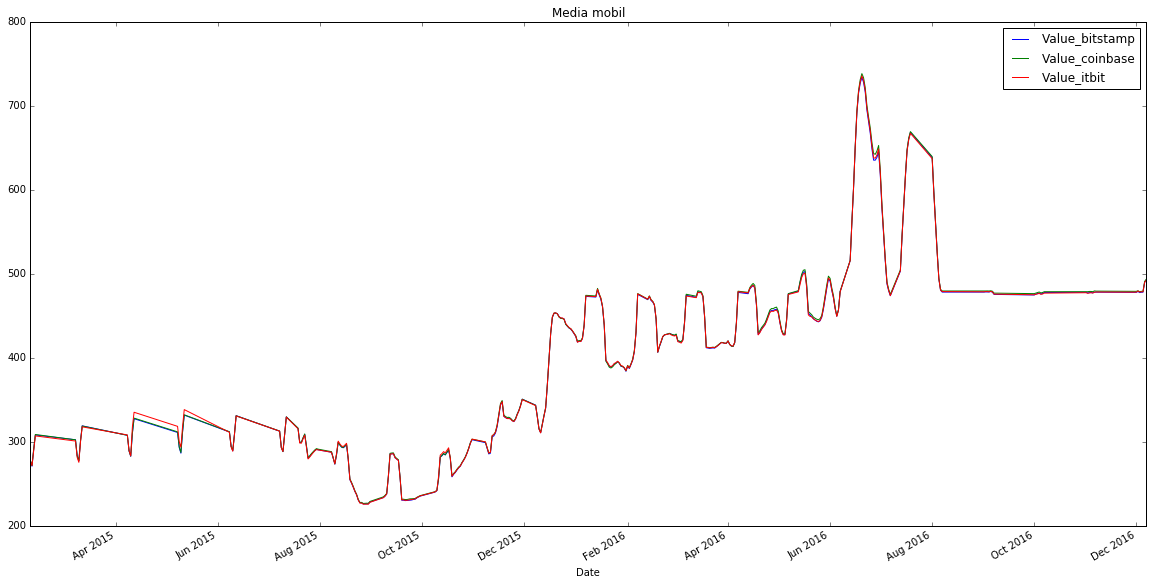

In [81]:
%matplotlib inline
Bitcoin_3markets_in_rm.plot(figsize=(20,10), title ="Media mobil") # Grafico la media mobil.

Representando cada mercado en un grafico diferente:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D557EB8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D831588>], dtype=object)

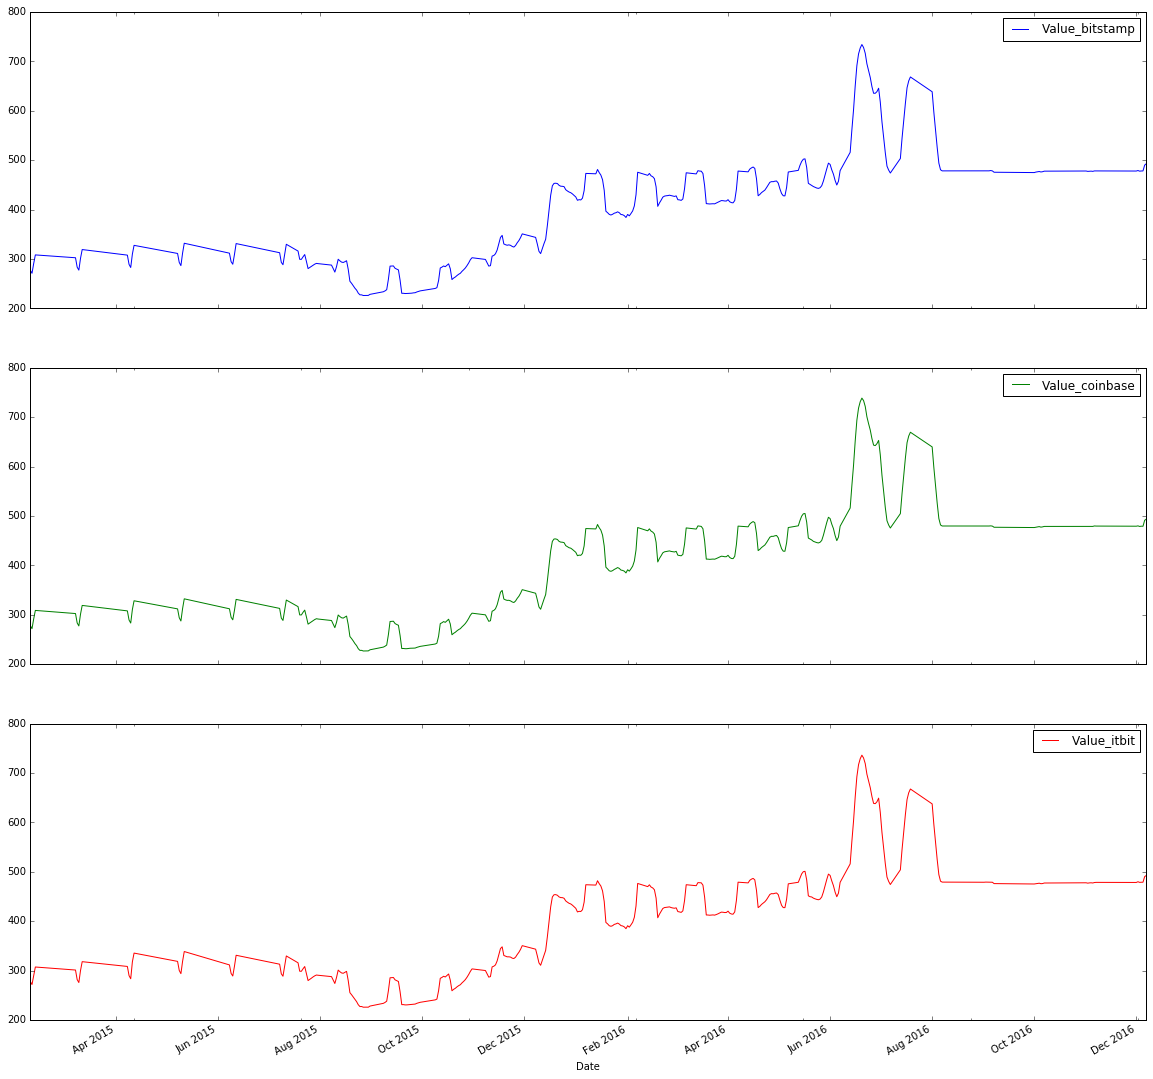

In [86]:
Bitcoin_3markets_in_rm.plot(subplots=True,figsize=(20,20))

• Obtén el máximo “spread” (diferencia para el mismo día en los diferentes exchanges) del precio de bitcoin, y el “spread medio” para todo el periodo.

Voy a añadir al data frame tres columnas que representen spread entre los precios de los índices.

In [48]:
Bitcoin_3markets_in['bitstamp-coinbase'] = Bitcoin_3markets_in['Value_bitstamp'] - Bitcoin_3markets_in['Value_coinbase']
Bitcoin_3markets_in['bitstamp-itbit'] = Bitcoin_3markets_in['Value_bitstamp'] - Bitcoin_3markets_in['Value_itbit']
Bitcoin_3markets_in['coinbase-itbit'] = Bitcoin_3markets_in['Value_coinbase'] - Bitcoin_3markets_in['Value_itbit']
Bitcoin_3markets_in.head()

,Value_bitstamp,Value_coinbase,Value_itbit,bitstamp-coinbase,bitstamp-itbit,coinbase-itbit
Date,,,,,,
2015-01-08,281.03,281.83,280.25,-0.80,0.78,1.58
2015-01-09,226.95,227.16,226.83,-0.21,0.12,0.33
2015-01-10,238.18,238.97,238.40,-0.79,-0.22,0.57
2015-01-11,324.05,327.22,326.58,-3.17,-2.53,0.64
2015-01-12,360.93,360.40,362.94,0.53,-2.01,-2.54


Para calcular el spread máximo y medio tomo el valor absoluto para no netear los valores positivos y los valores negativos.

In [45]:
spr_max_abs_bitstamp_coinbase=Bitcoin_3markets_in['bitstamp-coinbase'].abs().max()
spr_medio_bitstamp_coinbase=Bitcoin_3markets_in['bitstamp-coinbase'].abs().mean()

spr_max_abs_bitstamp_itbit=Bitcoin_3markets_in['bitstamp-itbit'].abs().max()
spr_medio_bitstamp_itbit=Bitcoin_3markets_in['bitstamp-itbit'].abs().mean()

spr_max_abs_coinbase_itbit=Bitcoin_3markets_in['coinbase-itbit'].abs().max()
spr_medio_coinbase_itbit=Bitcoin_3markets_in['coinbase-itbit'].abs().mean()
print '---------------------------------------------'
print 'spread maximo bitstamp-coinbase:',spr_max_abs_bitstamp_coinbase
print 'spread medio bitstamp-coinbase:',spr_medio_bitstamp_coinbase
print '---------------------------------------------'
print 'spread maximo bitstamp-itbit:',spr_max_abs_bitstamp_itbit
print 'spread medio bitstamp-itbit:',spr_medio_bitstamp_itbit
print '---------------------------------------------'
print 'spread maximo coinbase-itbit:',spr_max_abs_coinbase_itbit
print 'spread medio coinbase-itbit:',spr_medio_coinbase_itbit
print '---------------------------------------------'

---------------------------------------------
spread maximo bitstamp-coinbase: 14.3301
spread medio bitstamp-coinbase: 1.45871716621
---------------------------------------------
spread maximo bitstamp-itbit: 49.5399
spread medio bitstamp-itbit: 1.29504168937
---------------------------------------------
spread maximo coinbase-itbit: 48.24
spread medio coinbase-itbit: 1.71157956403
---------------------------------------------


• Crea gráficos que los comparen dos a dos, y que muestren con alguna indicación gráfica (por ejemplo, un punto de otro color) los días de mayor “spread”. Pista: puedes obtener un subconjunto del dataframe solo con estos días y dibujarlo como si fuese otra serie diferente.

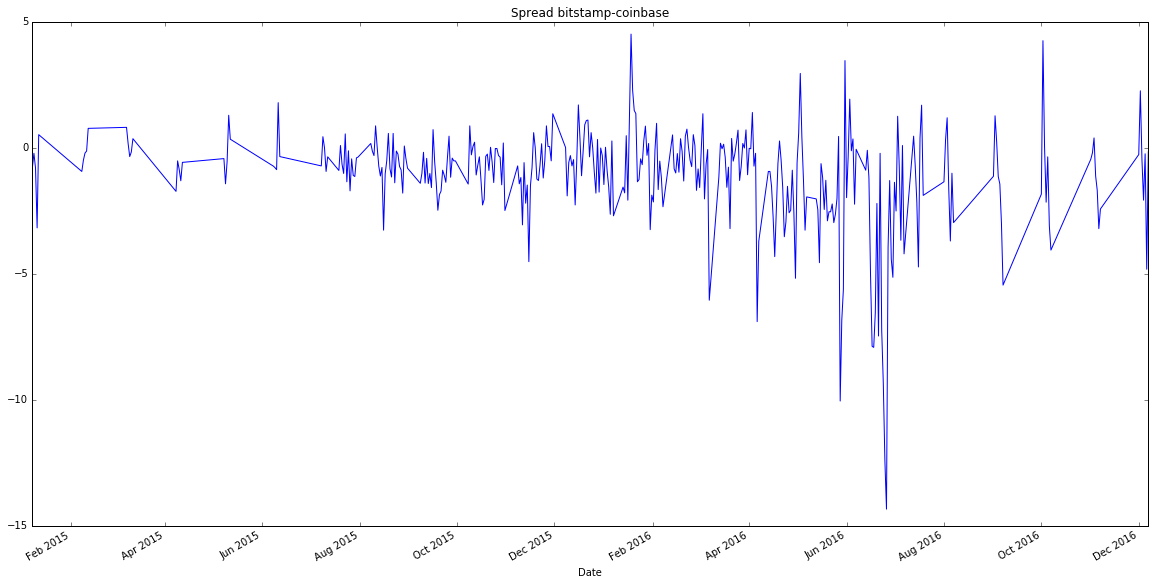

In [58]:
Bitcoin_3markets_in['bitstamp-coinbase'].plot(figsize=(20,10), title ="Spread bitstamp-coinbase",color="blue")

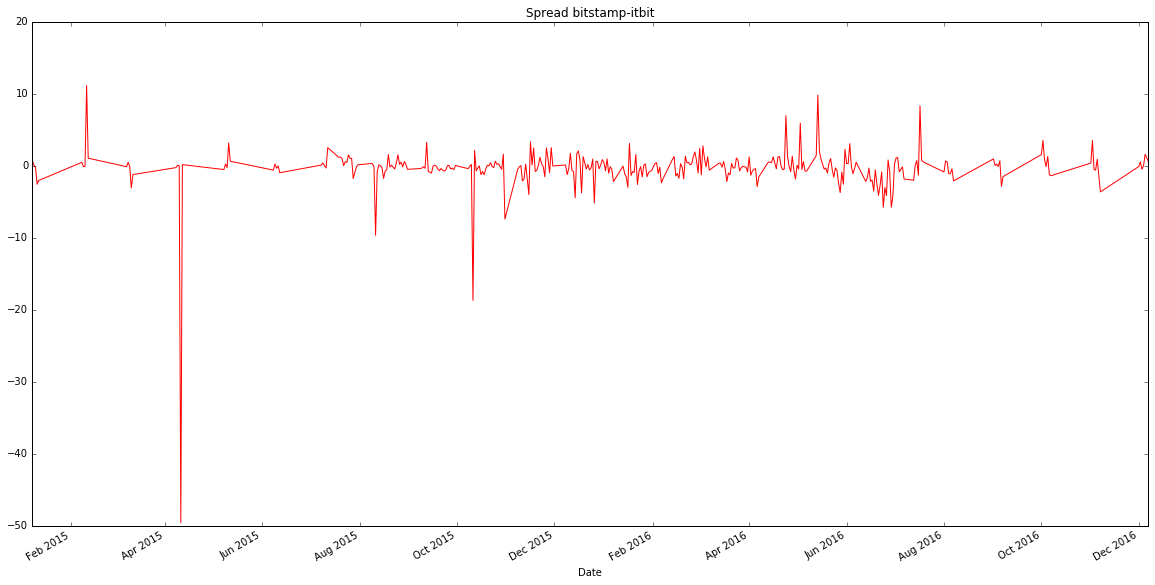

In [57]:
Bitcoin_3markets_in['bitstamp-itbit'].plot(figsize=(20,10), title ="Spread bitstamp-itbit",color="red")

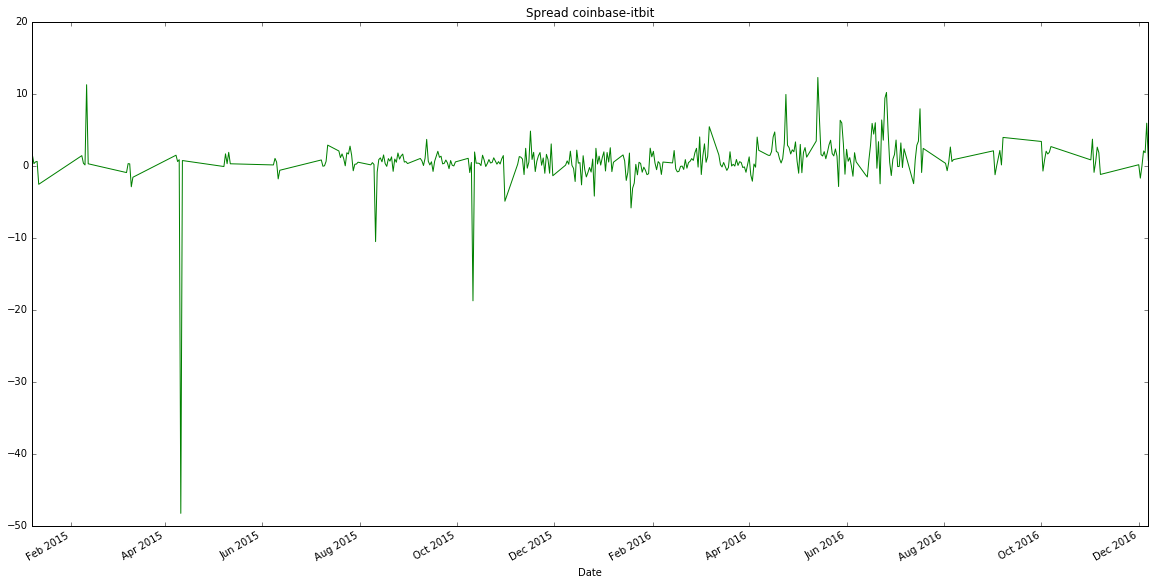

In [59]:
Bitcoin_3markets_in['coinbase-itbit'].plot(figsize=(20,10), title ="Spread coinbase-itbit",color="green")